In [1]:
suppressWarnings(suppressMessages(library(tidyverse)))
suppressWarnings(suppressMessages(library(hrbrthemes)))
suppressWarnings(suppressMessages(library(forcats)))
suppressWarnings(suppressMessages(library(glue)))
suppressWarnings(suppressMessages(library(viridis)))
suppressWarnings(suppressMessages(library(ggdendro)))
suppressWarnings(suppressMessages(library(grid)))
suppressWarnings(suppressMessages(library(colorspace)))
suppressWarnings(suppressMessages(library(cowplot)))
suppressWarnings(suppressMessages(library(ComplexHeatmap)))
library(circlize)
suppressWarnings(suppressMessages(library("dendextend")))

Warning message:
"package 'circlize' was built under R version 4.2.1"
circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




In [2]:
load(file='wildhigh_long.Rata')
load(file='wildSelect.Rata')

In [4]:
set.seed(123)
x1 = sample(c("", "snv"), 100, replace = TRUE, prob = c(8, 2))
x2 = sample(c("", "indel"), 100, replace = TRUE, prob = c(8, 2))
x2[x1 == "snv"] = ""
x3 = sample(c("", "intronic"), 100, replace = TRUE, prob = c(5, 5))
x4 = sample(c("", "exonic"), 100, replace = TRUE, prob = c(5, 5))
x3[x1 == "" & x2 == ""] = ""
x4[x1 == "" & x2 == ""] = ""
x4[x3 == "intronic"] = ""
x = apply(cbind(x1, x2, x3, x4), 1, function(x) {
    x = x[x != ""]
    paste(x, collapse = ";")
})
m = matrix(x, nrow = 10, ncol = 10, dimnames = list(paste0("g", 1:10), paste0("s", 1:10)))
m[1:4, 1:4]

,s1,s2,s3,s4
g1,,snv;intronic,snv;intronic,snv
g2,,,,snv;intronic
g3,,,,
g4,snv,indel;exonic,snv,


In [5]:
m

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10
g1,,snv;intronic,snv;intronic,snv,,indel;intronic,,,indel,
g2,,,,snv;intronic,,,,,,
g3,,,,,,,,indel;intronic,,indel;intronic
g4,snv,indel;exonic,snv,,,,,,,
g5,snv;intronic,,,,indel;intronic,,snv;exonic,,,indel;exonic
g6,indel;exonic,snv,indel;intronic,,,,,,,
g7,indel;intronic,,,indel;intronic,,,snv;intronic,,snv;intronic,
g8,snv;intronic,indel;intronic,,,,,snv;intronic,,snv;intronic,
g9,,,,indel;intronic,,snv;intronic,,indel;intronic,snv;intronic,
g10,,snv,,,snv,,,,indel;exonic,


In [6]:
alter_fun = list(
    background = function(x, y, w, h) 
        grid.rect(x, y, w*0.9, h*0.9, gp = gpar(fill = "#CCCCCC", col = NA)),
    # red rectangles
    snv = function(x, y, w, h) 
        grid.rect(x, y, w*0.9, h*0.9, gp = gpar(fill = "red", col = NA)),
    # blue rectangles
    indel = function(x, y, w, h) 
        grid.rect(x, y, w*0.9, h*0.9, gp = gpar(fill = "blue", col = NA)),
    # dots
    intronic = function(x, y, w, h) 
        grid.points(x, y, pch = 16),
    # crossed lines
    exonic = function(x, y, w, h) {
        grid.segments(x - w*0.4, y - h*0.4, x + w*0.4, y + h*0.4, gp = gpar(lwd = 2))
        grid.segments(x + w*0.4, y - h*0.4, x - w*0.4, y + h*0.4, gp = gpar(lwd = 2))
    }
)

In [7]:
alter_fun

$background
function(x, y, w, h) 
        grid.rect(x, y, w*0.9, h*0.9, gp = gpar(fill = "#CCCCCC", col = NA))

$snv
function(x, y, w, h) 
        grid.rect(x, y, w*0.9, h*0.9, gp = gpar(fill = "red", col = NA))

$indel
function(x, y, w, h) 
        grid.rect(x, y, w*0.9, h*0.9, gp = gpar(fill = "blue", col = NA))

$intronic
function(x, y, w, h) 
        grid.points(x, y, pch = 16)

$exonic
function(x, y, w, h) {
        grid.segments(x - w*0.4, y - h*0.4, x + w*0.4, y + h*0.4, gp = gpar(lwd = 2))
        grid.segments(x + w*0.4, y - h*0.4, x - w*0.4, y + h*0.4, gp = gpar(lwd = 2))
    }

In [8]:
alter_fun$snv

function(x, y, w, h) 
        grid.rect(x, y, w*0.9, h*0.9, gp = gpar(fill = "red", col = NA))

In [9]:
m

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10
g1,,snv;intronic,snv;intronic,snv,,indel;intronic,,,indel,
g2,,,,snv;intronic,,,,,,
g3,,,,,,,,indel;intronic,,indel;intronic
g4,snv,indel;exonic,snv,,,,,,,
g5,snv;intronic,,,,indel;intronic,,snv;exonic,,,indel;exonic
g6,indel;exonic,snv,indel;intronic,,,,,,,
g7,indel;intronic,,,indel;intronic,,,snv;intronic,,snv;intronic,
g8,snv;intronic,indel;intronic,,,,,snv;intronic,,snv;intronic,
g9,,,,indel;intronic,,snv;intronic,,indel;intronic,snv;intronic,
g10,,snv,,,snv,,,,indel;exonic,


All mutation types: snv, intronic, indel, exonic.

`alter_fun` is assumed vectorizable. If it does not generate correct
plot, please set `alter_fun_is_vectorized = FALSE` in `oncoPrint()`.

Colors are not defined for: intronic, exonic. They won't be shown in
the barplots.



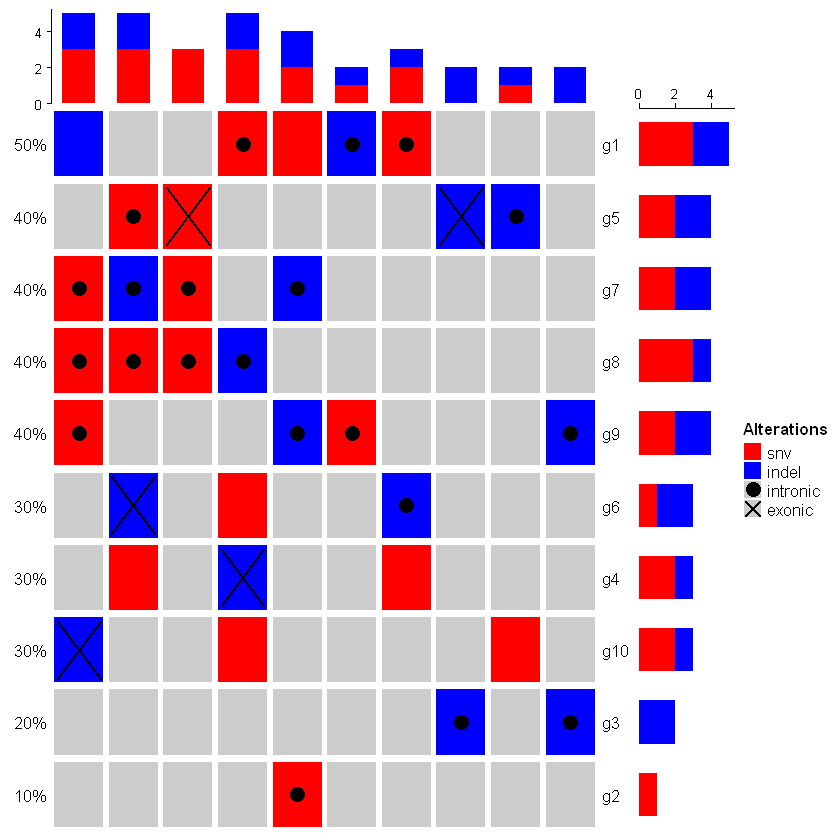

In [10]:
oncoPrint(m, alter_fun = alter_fun, col = c(snv = "red", indel = "blue"))